In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
df['bmi'].fillna(df['bmi'].mode()[0],inplace = True)

C:\Users\yuvar\AppData\Local\Temp\ipykernel_11464\4135932177.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mode()[0],inplace = True)


In [10]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
df = df.drop(columns = ['id'])

In [12]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [13]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [15]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [16]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [17]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [19]:
df['age'] = df['age'].astype(int)

<Axes: xlabel='bmi'>

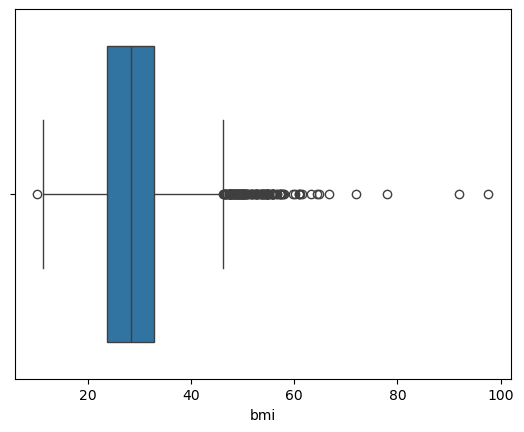

In [20]:
sns.boxplot(data=df, x='bmi')

In [21]:
!pip install feature-engine

In [22]:
Q1 = df['bmi'].quantile(0.55)
Q2 = df['bmi'].quantile(0.75)
Q3 = df['bmi'].quantile(0.95)

IQR = Q3 - Q1
lower_limit =  Q1 -1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(lower_limit)
print(upper_limit)

7.767499999999966
63.587500000000055


In [23]:
from feature_engine.outliers import ArbitraryOutlierCapper

arb = ArbitraryOutlierCapper(
    min_capping_dict={'bmi':7.767499999999966 },
    max_capping_dict={'bmi': 63.587500000000055}
)

df[['bmi']] = arb.fit_transform(df[['bmi']])

<Axes: xlabel='bmi'>

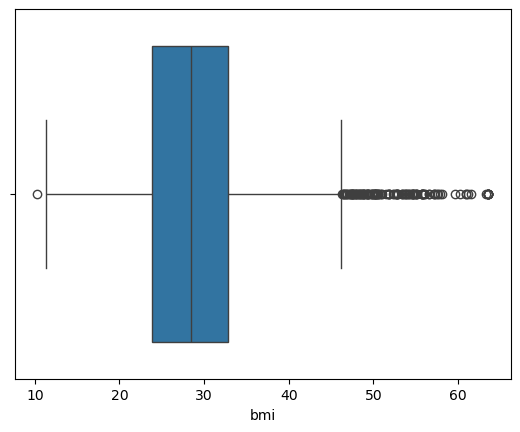

In [24]:
sns.boxplot(data = df , x = 'bmi')

In [25]:
Q1 = df['bmi'].quantile(0.45)
Q2 = df['bmi'].quantile(0.50)
Q3 = df['bmi'].quantile(0.85)

IQR = Q3 - Q1
lower_limit =  Q1 -1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(lower_limit)
print(upper_limit)

14.652500000000057
48.91249999999991


In [26]:
from feature_engine.outliers import ArbitraryOutlierCapper

arb = ArbitraryOutlierCapper(
    min_capping_dict={'bmi':14.652500000000057 },
    max_capping_dict={'bmi': 48.91249999999991}
)

df[['bmi']] = arb.fit_transform(df[['bmi']])

<Axes: xlabel='bmi'>

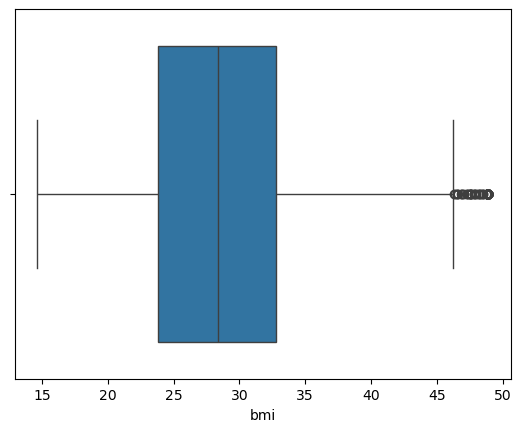

In [27]:
sns.boxplot(data = df , x = 'bmi')

In [28]:
Q1 = df['bmi'].quantile(0.40)
Q2 = df['bmi'].quantile(0.55)
Q3 = df['bmi'].quantile(0.75)

IQR = Q3 - Q1
lower_limit =  Q1 -1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(lower_limit)
print(upper_limit)

17.550000000000004
41.949999999999996


In [29]:
from feature_engine.outliers import ArbitraryOutlierCapper

arb = ArbitraryOutlierCapper(
    min_capping_dict={'bmi': 17.550000000000004},
    max_capping_dict={'bmi': 41.949999999999996}
)

df[['bmi']] = arb.fit_transform(df[['bmi']])

<Axes: xlabel='bmi'>

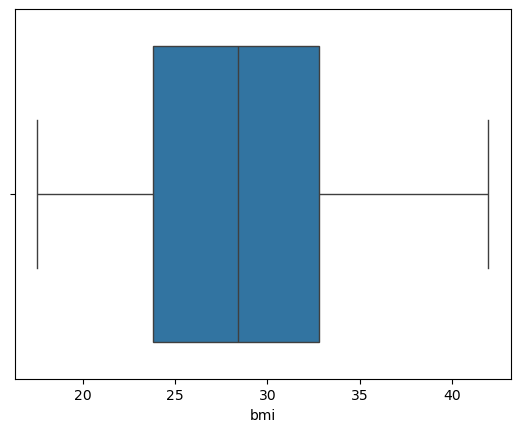

In [30]:
sns.boxplot(data = df , x = 'bmi')

In [31]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [32]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other': 2 })

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 439.3+ KB


In [34]:
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0 })

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 439.3+ KB


In [36]:
df['work_type'] = df['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4 })

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 439.3+ KB


In [38]:
df['Residence_type'] = df['Residence_type'].map({'Urban': 0, 'Rural': 1 })

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 439.3+ KB


In [40]:
df['smoking_status'] = df['smoking_status'].map({'never smoked': 0, 'formerly smoked': 1, 'smokes': 2, 'Unknown': 3})

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 439.3 KB


# Under sample technique

In [42]:
X = df.drop(columns = ['stroke'] ,axis=1)
y = df['stroke']

In [43]:
X.shape

(5110, 10)

In [44]:
y.shape

(5110,)

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [47]:
y_res.value_counts()

stroke
1    4861
0    4861
Name: count, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pickle

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

In [50]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
y_pred = model.predict(X_test)

In [52]:
y_pred

array([0, 1, 0, ..., 1, 0, 1])

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.94
Confusion Matrix:
 [[912  63]
 [ 46 924]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       975
           1       0.94      0.95      0.94       970

    accuracy                           0.94      1945
   macro avg       0.94      0.94      0.94      1945
weighted avg       0.94      0.94      0.94      1945



In [54]:
df['age'] = df['age'].astype(int)

In [55]:
df['avg_glucose_level'] = df['avg_glucose_level'].astype(int)

In [56]:
df['bmi'] = df['bmi'].astype(int)

#sns.heatmap(df.corr(),annot=True)

In [57]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,1,0,0,228,36,1,1
1,1,61,0,0,1,1,1,202,28,0,1
2,0,80,0,1,1,0,1,105,32,0,1
3,1,49,0,0,1,0,0,171,34,2,1
4,1,79,1,0,1,1,1,174,24,0,1


In [58]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,1,80,1,0,1,0,0,83,28,0,0
5106,1,81,0,0,1,1,0,125,40,0,0
5107,1,35,0,0,1,1,1,82,30,0,0
5108,0,51,0,0,1,0,1,166,25,1,0
5109,1,44,0,0,1,2,0,85,26,3,0


In [59]:
input_data = np.array([[0,	67	,0	,1	,1	,0	,0	,228,36	,1]])

In [60]:
prediction = model.predict(input_data)

C:\Users\yuvar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [61]:
print("Prediction:", prediction)

Prediction: [1]


In [62]:
with open('stroke_model.pkl','wb') as f:
    pickle.dump(model,f)